In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib
import os

In [44]:
# === Load data ===
data = pd.read_csv('/content/crude_oil_macro_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [45]:
# === Select target variable ===
target = data['Crude_Oil_Price'].dropna()


In [46]:

# === Split data ===
split_point = int(len(target) * 0.8)
train, test = target[:split_point], target[split_point:]


In [47]:
# === Train ARIMA model ===
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [48]:
# === Forecast ===
forecast = model_fit.forecast(steps=len(test))


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [49]:
# === Evaluate ===
mse = mean_squared_error(test, forecast)
print(f"\n\u2705 ARIMA Model MSE: {mse:.2f}")


✅ ARIMA Model MSE: 170.22


In [50]:
# === Save model ===
os.makedirs("models", exist_ok=True)
joblib.dump(model_fit, "arima_model.pkl")

['arima_model.pkl']

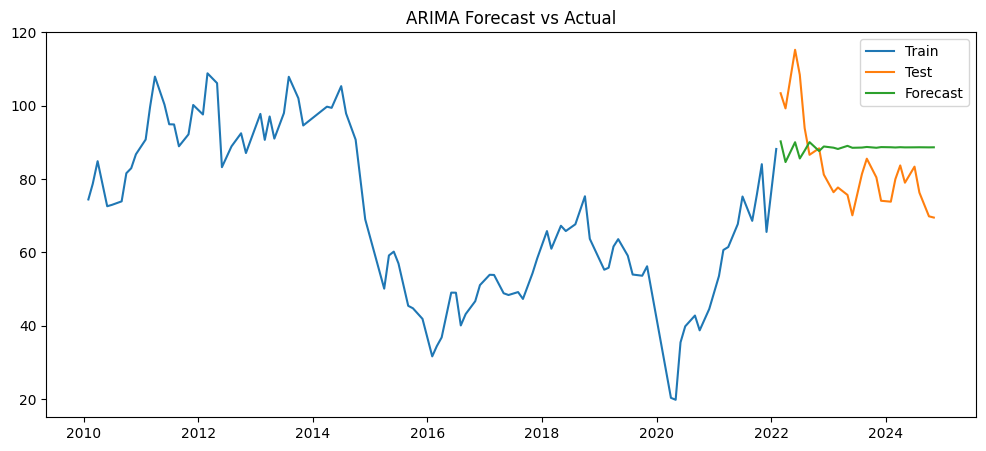

In [51]:
# === Plot ===
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.savefig("models/arima_forecast_plot.png")
plt.show()
